<a href="https://colab.research.google.com/github/MatheusrCunha/PDS_1/blob/main/Filtros_e_DFT_(3a_parte).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Filtragem no domínio da frequência com o método Overlap and Add (superposição e soma)

In [ ]:
import numpy as np
from scipy import signal, fftpack, io
import matplotlib.pyplot as plt
from IPython.display import Audio
from scipy.io import wavfile

Criação de um sinal de teste composto por duas senoides:

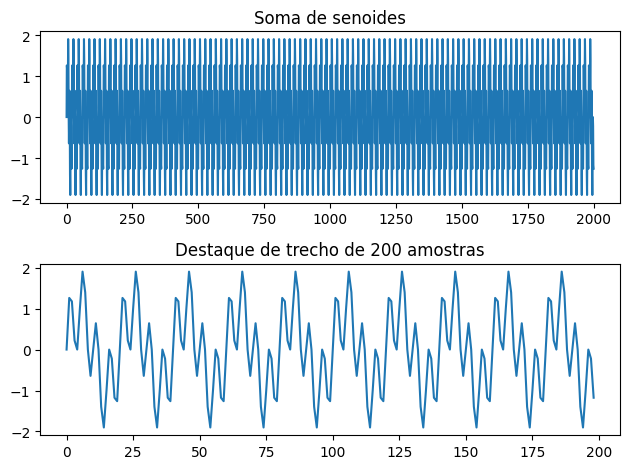

In [ ]:
Fs = 2000 # taxa de amostragem
f1 = 100 # frequência da primeira senoide
f2 = 400 # frequência da segunda senoide
fase_ini1 = 0 # ângulo de fase inicial da primeira senoide
fase_ini2 = 0 # ângulo de fase inicial da segunda senoide
ampl1 = 1 # amplitude da primeira senoide
ampl2 = 1 # amplitude da segunda senoide
durt = 1 # duração do sinal em segundos
Ts = 1/Fs # Periodo de amostragem
num_passos = np.round(durt*Fs).astype(int) # número de passos
n = np.arange(0,num_passos,1) # índices amostrais
x_sine_1 =  ampl1*np.sin(2*np.pi * f1 * n*Ts + fase_ini1)
x_sine_2 =  ampl2*np.sin(2*np.pi * f2 * n*Ts + fase_ini2) # Dobro da frequencia de x_sine_1
t = n*Ts # escala de tempo do sinal
composicao = x_sine_1+x_sine_2

fig, (sinalTotal, Destaque) = plt.subplots(2, 1)
sinalTotal.plot(composicao)
sinalTotal.set_title('Soma de senoides')
Destaque.plot(composicao[0:199])
Destaque.set_title('Destaque de trecho de 200 amostras')
fig.tight_layout()
fig.show()

In [ ]:
# Projeto de um filtro passa-baixa com fase linear usando firls
F_Nyq = Fs/2
B = signal.firls(101,(0, 200/F_Nyq, 300/F_Nyq, 1),(1, 1, 0.01, 0.01)) # Exemplo de passa-baixa com 101 taps (coeficientes)

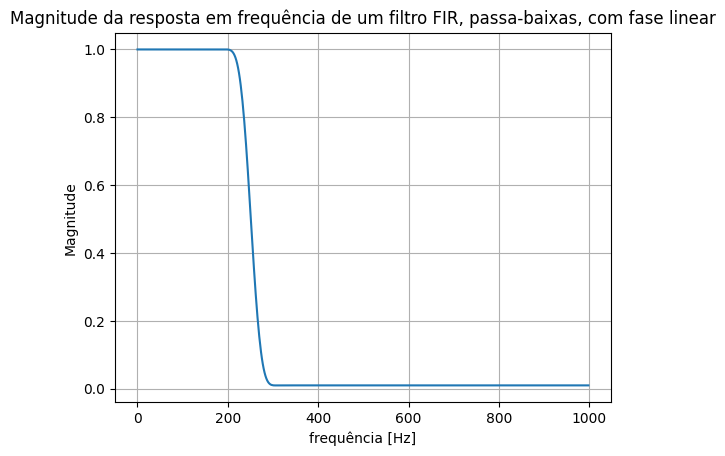

In [ ]:
w, H = signal.freqz(B, 1)
f= F_Nyq*(w/np.pi)
plt.plot(f, abs(H))

plt.title('Magnitude da resposta em frequência de um filtro FIR, passa-baixas, com fase linear')
plt.xlabel('frequência [Hz]')
plt.ylabel('Magnitude')
plt.grid()
plt.show()

Resposta ao impulso do filtro

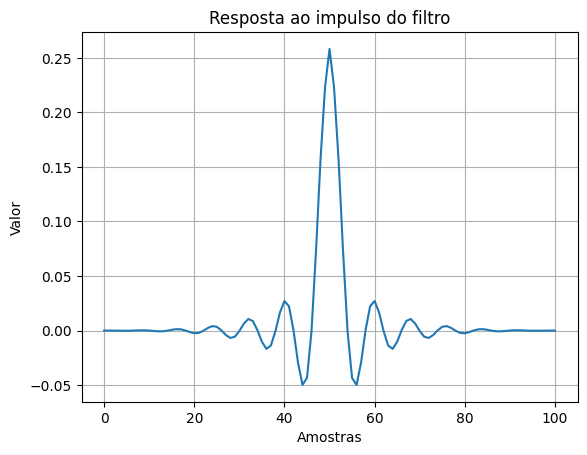

In [ ]:
plt.title('Resposta ao impulso do filtro')
plt.plot(B)
plt.ylabel('Valor')
plt.xlabel('Amostras')
plt.grid()
plt.show()

Filtrando no domínio do tempo

In [ ]:
sinal_filtrado_tempo = signal.lfilter(B, 1, composicao)

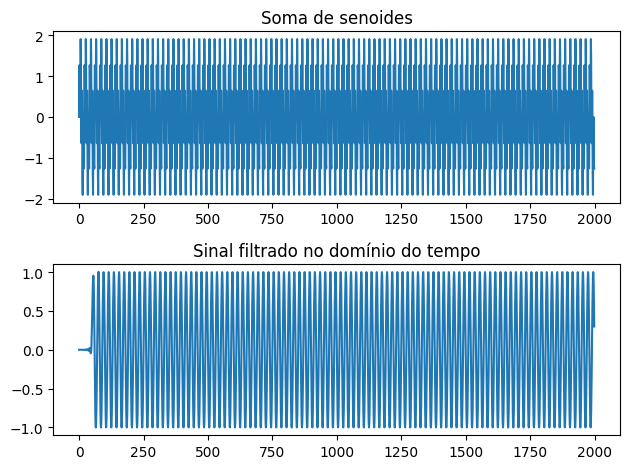

In [ ]:
fig, (ax_orig, ax_mag) = plt.subplots(2, 1)
ax_orig.plot(composicao)
ax_orig.set_title('Soma de senoides')
ax_mag.plot(sinal_filtrado_tempo)
ax_mag.set_title('Sinal filtrado no domínio do tempo')
fig.tight_layout()
fig.show()

Gráficos das primeiras 200 amostras dos sinais:

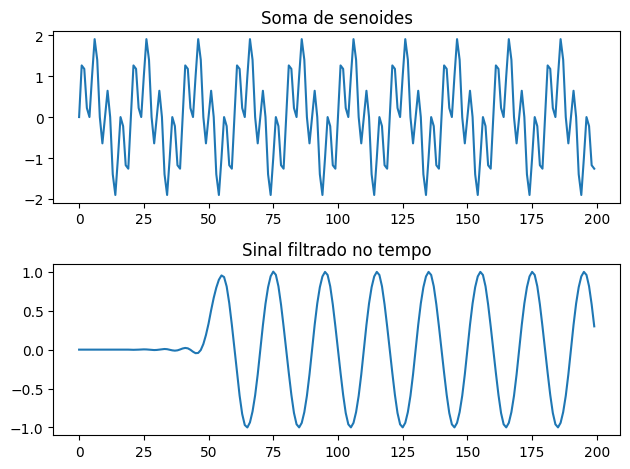

In [ ]:
fig, (ax_orig, ax_mag) = plt.subplots(2, 1)
ax_orig.plot(composicao[0:200])
ax_orig.set_title('Soma de senoides')
ax_mag.plot(sinal_filtrado_tempo[0:200])
ax_mag.set_title('Sinal filtrado no tempo')
fig.tight_layout()
fig.show()

Filtrando no domínio da frequência usando *Overlap and Add*:




In [ ]:
sinal_filtrado_frequencia = signal.oaconvolve(composicao, B) # https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.oaconvolve.html

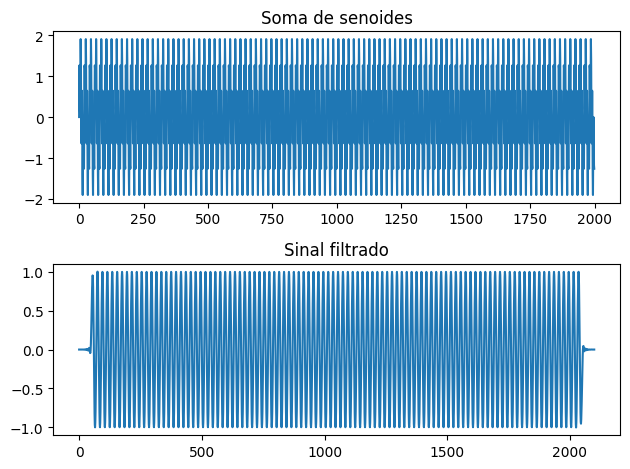

In [ ]:
fig, (ax_orig, ax_mag) = plt.subplots(2, 1)
ax_orig.plot(composicao)
ax_orig.set_title('Soma de senoides')
ax_mag.plot(sinal_filtrado_frequencia)
ax_mag.set_title('Sinal filtrado')
fig.tight_layout()
fig.show()

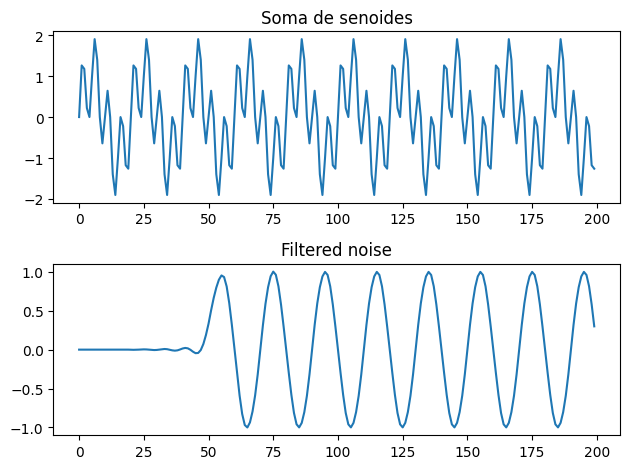

In [ ]:
fig, (ax_orig, ax_mag) = plt.subplots(2, 1)
ax_orig.plot(composicao[0:200])
ax_orig.set_title('Soma de senoides')
ax_mag.plot(sinal_filtrado_frequencia[0:200])
ax_mag.set_title('Filtered noise')
fig.tight_layout()
fig.show()

Mantendo apenas as partes onde houve superposição total com o kernel do filtro

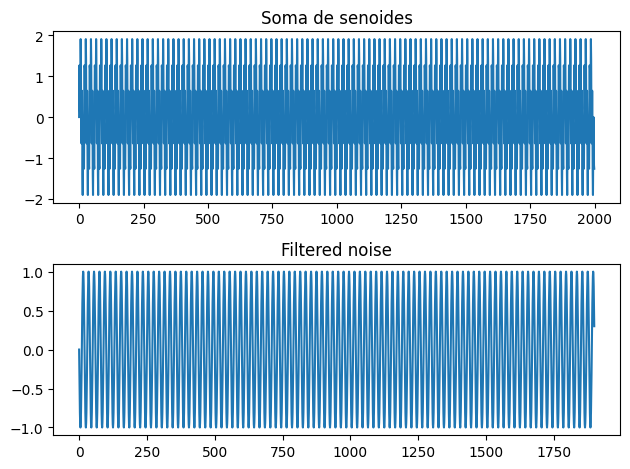

In [ ]:
fsig = signal.oaconvolve(composicao, B,'valid') # https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.oaconvolve.html
fig, (ax_orig, ax_mag) = plt.subplots(2, 1)
ax_orig.plot(composicao)
ax_orig.set_title('Soma de senoides')
ax_mag.plot(fsig)
ax_mag.set_title('Filtered noise')
fig.tight_layout()
fig.show()

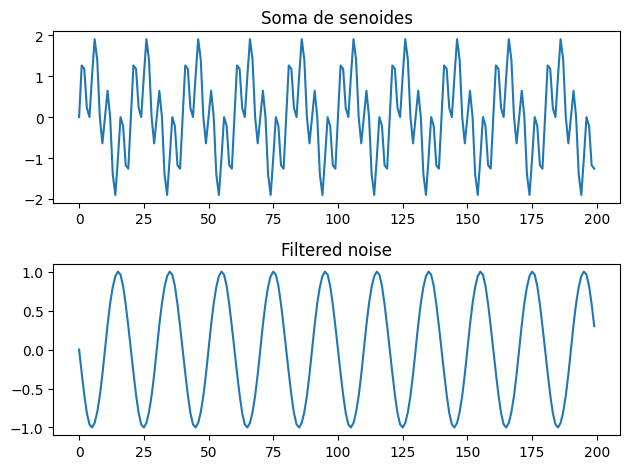

In [ ]:
fig, (ax_orig, ax_mag) = plt.subplots(2, 1)
ax_orig.plot(composicao[0:200])
ax_orig.set_title('Soma de senoides')
ax_mag.plot(fsig[0:200])
ax_mag.set_title('Filtered noise')
fig.tight_layout()
fig.show()